## **Laboratorio 5: Parte 1 - Algoritmos genéticos**
### **Actividades: Chameleon y Maze Runner**

**ISIS-3302:** Modelado, Simulación y Optimización

Departamento de Ingeniería de Sistemas y Computación

Universidad de los Andes

### **Integrantes - Grupo 15**

Daniel Felipe Diaz Moreno y Sara Sofía Cárdenas Rodríguez

### 1. Definición del Problema

- **Descripción Detallada**: Explicación del objetivo de camuflar el cubo ajustando su color en escala de grises.

En esta actividad, se tiene un fondo de un color en escala de grises, codificado del 0 al 255, donde 0 equivale a negro y 255 a blanco. El objetivo es que, partiendo de una cantidad fija de colores diversos, se pueda lograr que al menos uno de estos colores sea igual o muy cercano al color del fondo, mediante iteraciones de un algoritmo que es capaz de alterar esta población inicial. Por ello, se hace alusión al camuflaje de un cubo (fondo), ya que si la diferencia de colores es cada vez menor, se verá este efecto.

Esto se puede lograr mediante una metaheurística conocida como Algoritmo Genético (AG). Para ello, se inicializa una población inicial de un cierto tamaño, en este caso son individuos con un genoma que representa un color por medio de un entero entre 0 y 255. Luego, cada individuo es evaluado obteniendo una métrica, de acuerdo con su 'fitness' o cercanía con la solución óptima (color igual o parecido). Los mejores individuos son seleccionados para un cruce, aplicando mutaciones con una baja probabilidad. Finalmente, se reemplaza la población actual por los mejores individuos generados y anteriores, de acuerdo con el elitismo. Este procedimiento se repite hasta cumplir un límite de generaciones o llegar al color esperado. 

Nótese que en esta actividad se resuelven dos versiones de este mismo problema. Una manteniendo el color de fondo estático, y otra con una variación paulatina del fondo a lo largo de las generaciones

- **Justificación**: Razones por las cuales se utiliza un algoritmo genético para resolver este problema.

El uso de un algoritmo genético para resolver este problema de optimización del camaleón es adecuado debido a su capacidad para explorar eficientemente un espacio de soluciones lo suficientemente grande como este, donde la mejor solución puede ser estática o dinámica a lo largo del tiempo. En este caso, el AG permite conseguir una solución óptima o cercana en un tiempo finito que es lo suficientemente útil para nosotros, ya que existen dos criterios de parada, a saber alcanzar el color objetivo o cumplir una cantidad de iteraciones. 

Adicionalmente, se sabe que la utilización en conjunto de operadores evolutivos como selección, cruce y mutación garantiza una convergencia progresiva hacia la solución óptima con mecanismos que favorecen la exploración para no quedarse en puntos críticos locales, incluso cuando el fondo varía dinámicamente, haciendo del AG una herramienta robusta y flexible para este tipo de problemas. También son atractivas sus cualidades de búsqueda global junto a su adaptabilidad mediante hiperparámetros y la definición del algoritmo

### 2. Diseño del Algoritmo Genético

#### 2.1. Especificación de Componentes: Detalles de cada componente del algoritmo (representación genética, función de aptitud, operadores genéticos, etc.).



##### 2.1.1. Representación Genética (Codificación)

- **Genotipo**: Cada individuo será un entero entre 0 y 255. Por ello, cada individuo representa un posible color del cubo
- **Fenotipo**: Cada individuo mostrará un color entre negro y blanco, abarcando todos los tonos de gris. Por ello, el fenotipo es el color visible del cubo en escala de grises
- **Codificación**: De acuerdo con la escala propuesta, 0 representa negro y 255 blanco, por lo que por ejemplo un 127 es un gris medio. Es así como se utiliza un valor numérico para el nivel de gris. A mayor número, mayor luminosidad

##### 2.1.2. Población Inicial

- **Tamaño de la Población**: 25 individuos.
- **Inicialización**: Los valores de gris de los individuos se generan aleatoriamente entre 0 y 255.

##### 2.1.3. Función de Aptitud (Fitness Function)

- **Objetivo**: Minimizar la diferencia absoluta entre el nivel de gris del individuo y el nivel de gris del fondo.
- **Función de Aptitud**: ${Aptitud}(i) = -|\text{Gris}_{\text{individuo}} - \text{Gris}_{\text{fondo}}|$
- **Función objetivo**: $Max ({Aptitud}(i))$ 


##### 2.1.5. Operadores Genéticos

##### a. Selección

- **Criterio de Supervivencia**: Solo el 20% de los individuos con mayor aptitud sobreviven para la siguiente generación.
- **Método de Selección**: Selección elitista, donde se conservan los mejores individuos.

##### b. Cruce (Crossover)

- **Tipo de Cruce**: Cruce uniforme.
- **Proceso**: Se seleccionan pares de padres y nacen dos nuevos hijos, uno con la suma de los genotipos de sus padres y otro con el promedio. A ambos valores se les aplica el modulo con 256 para evitar valores no validos

##### c. Mutación

- **Probabilidad de Mutación**:  1%, siendo un valor reducido.
- **Proceso**: Se añade o resta un valor aleatorio entre -15 y 15 al color del individuo

##### 2.1.6. Criterio de Parada

- **Condiciones**:
  - Alcanzar un nivel de aptitud satisfactorio (la diferencia debe ser de 0, por lo que el fitness debe arrojar 0).
  - Llegar a un número máximo de generaciones (por ejemplo 50).

#### 2.2. Diagrama de Flujo: Visualización de los pasos del algoritmo para facilitar la comprensión del proceso.
![Diagrama de flujo](flujo.png)

### 3. Implementación

- **Código Fuente**: Implementación del algoritmo en un lenguaje de programación adecuado. En este caso, se realizó con Python.
- **Comentarios y Documentación**: Explicaciones dentro del código para clarificar las funciones y procedimientos utilizados.

In [55]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import time

In [ ]:
class IndividuoCamuflaje:
    """
    Representa un individuo en la población, definido por un genotipo (color en
    escala de grises) y su fitness asociado, que mide su cercanía al color del fondo.
    """

    """
    Inicializa un individuo con su genotipo y fitness asociado
    """
    def __init__(self, camuflaje=None):
         # El genotipo se inicializa aleatoriamente entre 0 y 255 si no se proporciona un valor específico.
        self.genotipo = camuflaje or random.randint(0, 255)
        # Fitness inicializado en 0, ya que se calcula más adelante.
        self.fitness = 0

class AlgoritmoGeneticoCamuflaje:
    """
    Implementa un algoritmo genético para optimizar el camuflaje de un cubo en un fondo.
    """

    """
    Inicializa los parámetros del algoritmo genético
    """
    def __init__(self, poblacion, generaciones, tasaCruce, tasaMutacion, elitismo, fondo):
        # Número de individuos en la población
        self.tamañoPoblacion = poblacion
        # Máximo número de generaciones
        self.generaciones = generaciones
        # Probabilidad de realizar cruce entre dos padres
        self.tasaCruce = tasaCruce
        # Probabilidad de mutación por individuo
        self.tasaMutacion = tasaMutacion
        # Cantidad de individuos de la población actual que pasan a la siguiente generación
        self.elitismo = int(elitismo * poblacion)
        # Inicializa la población
        self.poblacion = self.inicializarPoblacion(self.tamañoPoblacion)
        # Generación actual
        self.generacion = 0
        # Color del fondo en escala de grises
        self.fondo = fondo
        # Evolución de los niveles de gris
        self.evolucion = []

    """
    Crea una población inicial de individuos con colores aleatorios
    """
    def inicializarPoblacion(self, poblacion):
        return [IndividuoCamuflaje() for _ in range(poblacion)]

    """
    Calcula el fitness de cada individuo en la población.
    """
    def evaluarPoblacion(self):
        for individuo in self.poblacion:
            individuo.fitness = self.evaluarFitness(individuo)

    """
    Calcula el fitness como la diferencia absoluta con signo negativo respecto al color del fondo
    """
    def evaluarFitness(self, individuo):
        return -abs(individuo.genotipo - self.fondo)

    """
    Selecciona dos padres al azar de la población.
    """
    def seleccionarPadres(self):
        return random.choices(self.poblacion, k=2)

    """
    Realiza el cruce entre dos padres para generar dos hijos.
    """
    def cruzar(self, padre1, padre2):
        # Hijo 1: Suma de los genotipos de los padres ajustado al rango 0 - 255
        hijo1 = IndividuoCamuflaje((padre1.genotipo + padre2.genotipo) % 256)
        # Hijo 2: Promedio de los genotipos de los padres ajustado al rango 0 - 255
        hijo2 = IndividuoCamuflaje((padre1.genotipo + abs(padre1.genotipo - padre2.genotipo)//2 ) % 256)
        return hijo1, hijo2

    """
    Realiza una mutación en el genotipo del individuo, sumando un cambio aleatorio
    """
    def mutar(self, individuo):
        individuo.genotipo = (individuo.genotipo + random.randint(-15, 15)) % 256

    """
    Verifica si se ha alcanzado la solución óptima (fitness igual a 0)
    """
    def condicionDeTerminacion(self):
        return abs(self.mejorIndividuo().fitness) == 0

    """
    Combina los mejores individuos de la generación actual y la nueva población según el elitismo.
    """
    def aplicarElitismo(self, poblacion, nuevaPoblacion, elitismo):
        # Ordena las poblaciones por fitness en orden descendente
        poblacion.sort(key=lambda individuo: individuo.fitness, reverse=True)
        nuevaPoblacion.sort(key=lambda individuo: individuo.fitness, reverse=True)
        # Conserva los mejores individuos de ambas poblaciones según el elitismo
        return poblacion[:elitismo] + nuevaPoblacion[:self.tamañoPoblacion - elitismo]

    """
    Retorna el mejor individuo de la población actual.
    """
    def mejorIndividuo(self):
        return max(self.poblacion, key=lambda individuo: individuo.fitness)
    
    """
    Retorna las métricas clave de la generación actual.
    """
    def obtenerMetricas(self):
        mejor = self.mejorIndividuo()
        return {
            'generacion': self.generacion,
            'fitness': mejor.fitness,
            'genotipo': mejor.genotipo,
            'fondo': self.fondo
        }

    """
    Ejecuta el ciclo del algoritmo genético hasta alcanzar el límite de generaciones o la solución óptima.
    """
    def ejecutar(self):
        # Evalúa la población inicial
        self.evaluarPoblacion()
        # Bucle principal de evolución
        while self.generacion < self.generaciones and not self.condicionDeTerminacion():
            nuevaPoblacion = []
            for _ in range(self.tamañoPoblacion - self.elitismo):
                # Selecciona padres para el cruce
                padre1, padre2 = self.seleccionarPadres()
                # Realiza el cruce con una probabilidad dada por la tasa de cruce
                if random.random() < self.tasaCruce:
                    hijo1, hijo2 = self.cruzar(padre1, padre2)
                else:
                    hijo1, hijo2 = padre1, padre2
                # Añade los hijos a la nueva población
                nuevaPoblacion.extend([hijo1, hijo2])

            # Aplica mutaciones a la nueva población
            for individuo in nuevaPoblacion:
                if random.random() < self.tasaMutacion:
                    self.mutar(individuo)

            # Aplica elitismo y actualiza la población
            self.poblacion = self.aplicarElitismo(self.poblacion, nuevaPoblacion, self.elitismo)

            # Evalúa la nueva población
            self.evaluarPoblacion()

            # Guarda la evolución de los niveles de gris
            self.evolucion.append([individuo.genotipo for individuo in sorted(self.poblacion, key=lambda individuo: individuo.fitness, reverse=True)])

            # Incrementa el contador de generaciones
            self.generacion += 1
            
        # Retorna el mejor individuo encontrado
        return self.mejorIndividuo()



### 4. Pruebas y Resultados

- **Datos de Prueba**: Información sobre el fondo (nivel de gris) y parámetros utilizados.

A continuación se presentan los parámetros a utilizar de acuerdo con el diseño

In [46]:
# Se utilizó una población de 25 individuos, ya que 100 es excesivo para 256 colores posibles
tamañoPoblacion = 25
# El máximo de generaciones se estableció en 50 para evitar un tiempo de ejecución excesivo
generaciones = 50
# Se estableció una probabilidad de cruce de 0.8, ya que se busca que la mayoría de los individuos se crucen
probabilidadCruce = 0.8
# Se estableció un elitismo de 0.2, ya que se busca que una pequeña parte de la población original se conserve (los mejores)
elitismo = 0.2
# Se estableció una probabilidad de mutación del 1%, ya que se busca que sea poco frecuente
probabilidadMutacion = 0.01
# Se estableció un color de fondo de 128, siendo un color intermedio
fondo = 128

- **Ejecución del Algoritmo**: Descripción de cómo se ejecutó el algoritmo, incluyendo el número de generaciones y tiempos de ejecución.

Ejecutamos el algoritmo diez veces para evaluar su comportamiento frente la obtención de una solución óptima para un fondo de 128. Guardamos la información sobre su generación, su fitness y genotipo final, al igual que el tiempo de ejecución. También obtenemos el promedio de estas medidas para tener un panorama general de su funcionamiento

In [41]:
resultados = []
cantidadPruebas = 10
for _ in range(cantidadPruebas):
    inicio = time.time()
    algoritmoGeneticoCamuflaje = AlgoritmoGeneticoCamuflaje(tamañoPoblacion, generaciones, probabilidadCruce, probabilidadMutacion, elitismo, fondo)
    algoritmoGeneticoCamuflaje.ejecutar()
    m = algoritmoGeneticoCamuflaje.obtenerMetricas()
    resultados.append((m['generacion'], m['fitness'], m['genotipo'], m['fondo'], (time.time() - inicio) * 1000))

generacionPromedio, fitnessPromedio, genotipoPromedio, fondo, tiempoPromedio = 0, 0, 0, 0, 0
for generacion, fitness, genotipo, fondo, tiempo in resultados:
    generacionPromedio += generacion
    fitnessPromedio += fitness
    genotipoPromedio += genotipo
    tiempoPromedio += tiempo

resultados.append((generacionPromedio/cantidadPruebas, fitnessPromedio/cantidadPruebas, genotipoPromedio/cantidadPruebas, fondo, tiempoPromedio/cantidadPruebas))
df = pd.DataFrame(resultados, columns=['Generación', 'Fitness', 'Genotipo', 'Fondo', 'Tiempo de ejecución (ms)'])

Estas son las generaciones, el fitness obtenido, el genotipo y el tiempo de ejecución para diez ejecuciones del algoritmo con los parámetros actuales.
 
Se evidencia que todas las soluciones terminaron por el criterio de alcanzar el óptimo, por lo que no terminaron por número de generaciones

In [42]:
df.head(10)

,Generación,Fitness,Genotipo,Fondo,Tiempo de ejecución (ms)
0,0.0,0.0,128.0,128,0.000000
1,12.0,0.0,128.0,128,1.004457
2,4.0,0.0,128.0,128,0.999928
3,10.0,0.0,128.0,128,0.999212
4,9.0,0.0,128.0,128,1.000643
5,3.0,0.0,128.0,128,0.998735
6,0.0,0.0,128.0,128,0.000000
7,4.0,0.0,128.0,128,1.002789
8,4.0,0.0,128.0,128,0.996828
9,32.0,0.0,128.0,128,4.001856


Esta es la cantidad promedio de generaciones, el promedio del fitness, el genotipo promedio y el tiempo de ejecución promedio para diez ejecuciones del algoritmo que se evidenciaron anteriormente

In [44]:
df.tail(1)

,Generación,Fitness,Genotipo,Fondo,Tiempo de ejecución (ms)
10,7.8,0.0,128.0,128,1.100445


Consideramos que este es un resultado satisfactorio, ya que el promedio de generaciones es razonable, se alcanzó siempre el genotipo esperado antes de forzar la finalización del algoritmo y por lo tanto el tiempo de ejecución es bajo. De esta manera, los hiperparámetros escogidos conforman un buen punto intermedio entre tener pocas generaciones por una gran cantidad de individuos (se llega por probabilidad y no por el AG) y tener una alta cantidad de iteraciones por pocos individuos (la convergencia es lenta).

- **Resultados Obtenidos**: Presentación de los niveles de gris de los individuos a lo largo de las generaciones y cómo se acercan al nivel de gris del fondo.

A continuación, se evidencia un ejemplo de cómo los 25 individuos se van acercando paulatinamente al valor esperado a lo largo de 10 generaciones. Se tiene su genotipo y fenotipo en el siguiente diagrama. Cabe resaltar que este es ligeramente uno de los peores casos de convergencia rápida, ya que se encuentra por encima del promedio en términos de generaciones. No obstante, otorga una visualización llamativa y más comprensible

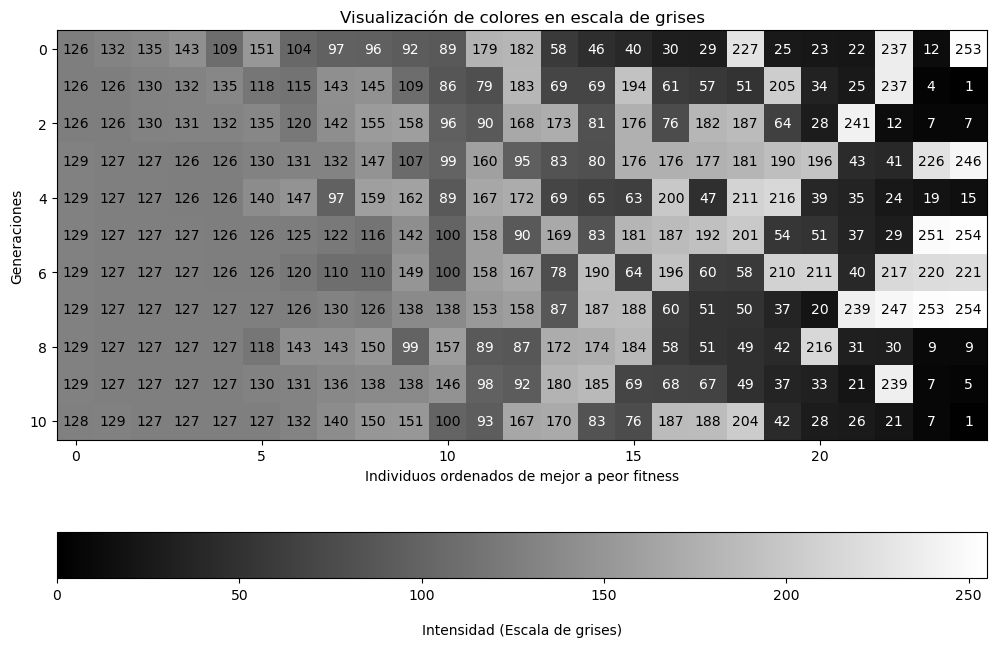

In [82]:
# Se ejecuta el algoritmo
algoritmoGeneticoCamuflaje = AlgoritmoGeneticoCamuflaje(tamañoPoblacion, generaciones, probabilidadCruce, probabilidadMutacion, elitismo, fondo)
algoritmoGeneticoCamuflaje.ejecutar()

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(12, 12))

# Mostrar los valores como una imagen en escala de grises
cax = ax.imshow(algoritmoGeneticoCamuflaje.evolucion, cmap='gray', vmin=0, vmax=255)

# Añadir una barra de color para referencia
cbar = fig.colorbar(cax, ax=ax, orientation='horizontal', pad=0.1)
cbar.set_label('Intensidad (Escala de grises)', labelpad=15)

# Añadir título y nombres de ejes
ax.set_title('Visualización de colores en escala de grises')
ax.set_xlabel('Individuos ordenados de mejor a peor fitness')
ax.set_ylabel('Generaciones')

# Añadir los números dentro de cada celda
for i in range(len(algoritmoGeneticoCamuflaje.evolucion)):  # Filas
    for j in range(algoritmoGeneticoCamuflaje.tamañoPoblacion):  # Columnas
        ax.text(j, i, f'{algoritmoGeneticoCamuflaje.evolucion[i][j]}', ha='center', va='center', color='white' if algoritmoGeneticoCamuflaje.evolucion[i][j] < 100 else 'black')

# Mostrar la visualización
plt.show()

**Nota:** Es importante conocer la probabilidad de obtener la solución óptima sin iterar

La probabilidad de adivinar correctamente un número entre 0 y 255 en un solo intento es:

$$
P(\text{adivinar}) = \frac{1}{256}
$$

La probabilidad de no adivinar en un intento es:

$$
P(\text{no adivinar}) = 1 - P(\text{adivinar}) = 1 - \frac{1}{256} = \frac{255}{256}
$$

La probabilidad de no adivinar en 25 intentos es:

$$
P(\text{no adivinar en 25 intentos}) = \left( \frac{255}{256} \right)^{25}
$$

Finalmente, la probabilidad de adivinar al menos una vez en 25 intentos es:

$$
P(\text{adivinar al menos una vez}) = 1 - P(\text{no adivinar en 25 intentos}) = 1 - \left( \frac{255}{256} \right)^{25}
$$

Al calcular esto, obtenemos una probabilidad de aproximadamente **0.0932** o **9.32%**, lo que es razonable y justifica la selección de este parámetro (cantidad de individuos de la población inicial)

### 5. Caso de Estudio: El color de fondo va a cambiar a lo largo de las generaciones
- **Descripción del Problema**: Se desea camuflar un cubo en un entorno donde el color de fondo cambia a lo largo del tiempo.
- **Modificación del Algoritmo**: Se debe adaptar el algoritmo genético para manejar la variabilidad del color de fondo y ajustar el cubo en consecuencia.
- **Consideraciones Adicionales**: Se debe evaluar cómo la variabilidad afecta el desempeño del algoritmo y si se requieren ajustes en los parámetros.



Se aumenta la cantidad de individuos de 80 a 100 para mejorar la precisión del algoritmo genético, disminuyendo la cantidad de generaciones y la diferencia absoluta con respecto al color actual

In [ ]:
class AlgoritmoGeneticoCamuflajeCambiante(AlgoritmoGeneticoCamuflaje):
    def __init__(self, poblacion, generaciones, tasaCruce, tasaMutacion, elitismo, fondo):
        super().__init__(poblacion, generaciones, tasaCruce, tasaMutacion, elitismo, fondo)
        
    def cambiarFondo(self):
        self.fondo = (self.fondo + random.randint(-25, 25)) % 256

    def ejecutar(self):
        self.evaluarPoblacion()
        while self.generacion < self.generaciones and not self.condicionDeTerminacion():
            nuevaPoblacion = []
            for _ in range(self.tamañoPoblacion - self.elitismo):
                padre1, padre2 = self.seleccionarPadres()
                if random.random() < self.tasaCruce:
                    hijo1, hijo2 = self.cruzar(padre1, padre2)
                else:
                    hijo1, hijo2 = padre1, padre2
                nuevaPoblacion.extend([hijo1, hijo2])
            for individuo in nuevaPoblacion:
                if random.random() < self.tasaMutacion:
                    self.mutar(individuo)

            self.poblacion = self.aplicarElitismo(self.poblacion, nuevaPoblacion, self.elitismo)

            self.cambiarFondo()
            self.evaluarPoblacion()
            self.generacion += 1
        return self.mejorIndividuo()


In [56]:
tamañoPoblacion = 100
generaciones = 100
probabilidadCruce = 0.8
elitismo = 0.2
probabilidadMutacion = 0.01
fondo = 128

algoritmoGeneticoCamuflaje = AlgoritmoGeneticoCamuflajeCambiante(tamañoPoblacion, generaciones, probabilidadCruce, probabilidadMutacion, elitismo, fondo)
algoritmoGeneticoCamuflaje.ejecutar()
print(algoritmoGeneticoCamuflaje.obtenerMetricas())

{'generacion': 2, 'fitness': 0, 'genotipo': 144, 'fondo': 144}


### 6. Análisis de Resultados

- **Gráficas y Tablas**: 
  - Visualización del progreso del algoritmo, como gráficas de aptitud promedio y máxima por generación.
  - Visualización de el camuflaje obtenido para esa generación.
- **Interpretación**: Análisis de cómo el algoritmo logró mejorar la aptitud de los individuos y si se alcanzó el objetivo de camuflaje.
- **Discusión de Desempeño**: Evaluación de la eficacia del algoritmo y posibles mejoras.



### 7. Conclusiones

- **Resumen de Hallazgos**: Síntesis de los resultados y su relevancia.
- **Aprendizajes**: Lecciones obtenidas del desarrollo y ejecución del algoritmo.
- **Recomendaciones**: Sugerencias para futuras implementaciones o ajustes al algoritmo.
